## Lesson 3: Visualizing Embeddings

#### Project environment setup

- Load credentials and relevant Python Libraries

In [1]:
from utils import authenticate
credentials, PROJECT_ID = authenticate() #Get credentials and project ID

In [2]:
REGION = 'us-central1'

#### Enter project details

In [3]:
# Import and initialize the Vertex AI Python SDK

import vertexai
vertexai.init(project=PROJECT_ID, 
              location=REGION, 
              credentials = credentials)

## Embeddings capture meaning

In [4]:
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"


in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"


in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!" 


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [5]:
import numpy as np
from vertexai.language_models import TextEmbeddingModel

embedding_model = TextEmbeddingModel.from_pretrained(
    "textembedding-gecko@001")

- Get embeddings for all pieces of text.
- Store them in a 2D NumPy array (one row for each embedding).

In [6]:
embeddings = []
for input_text in input_text_lst_news:
    emb = embedding_model.get_embeddings(
        [input_text])[0].values
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings) 

In [7]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 768)
[[ 0.04559246 -0.01472285 -0.02949955 ...  0.04057328 -0.03193641
  -0.01936668]
 [-0.01995482  0.00037652  0.0116593  ...  0.02617216 -0.03978169
  -0.02036468]
 [ 0.01030084  0.02219611  0.02433357 ...  0.03538613 -0.0273955
  -0.04193578]
 ...
 [-0.0263201  -0.01767797 -0.01261324 ... -0.01372547  0.00060259
   0.01581882]
 [-0.00561961 -0.02237099 -0.03271009 ... -0.02777804 -0.03388645
  -0.01553735]
 [ 0.00867064 -0.0131854   0.04283332 ... -0.04224638  0.01800203
   0.01088098]]


#### Reduce embeddings from 768 to 2 dimensions for visualization
- We'll use principal component analysis (PCA).
- You can learn more about PCA in [this video](https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/lecture/73zWO/reducing-the-number-of-features-optional) from the Machine Learning Specialization. 

In [8]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [9]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[-0.40980753 -0.10084478]
 [-0.39561909 -0.18401444]
 [-0.29958523  0.07514691]
 [ 0.16077688  0.32879395]
 [ 0.1893873   0.48556638]
 [ 0.31516547 -0.23624716]
 [ 0.4396822  -0.36840086]]


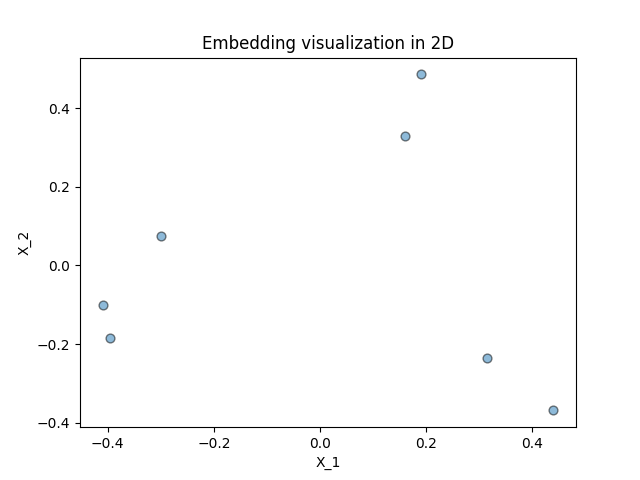

In [10]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib ipympl

from utils import plot_2D
plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

#### Embeddings and Similarity
- Plot a heat map to compare the embeddings of sentences that are similar and sentences that are dissimilar.

In [11]:
in_1 = """He couldn’t desert 
          his post at the power plant."""

in_2 = """The power plant needed 
          him at the time."""

in_3 = """Cacti are able to 
          withstand dry environments.""" 

in_4 = """Desert plants can 
          survive droughts.""" 

input_text_lst_sim = [in_1, in_2, in_3, in_4]

In [12]:
embeddings = []
for input_text in input_text_lst_sim:
    emb = embedding_model.get_embeddings([input_text])[0].values
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings) 

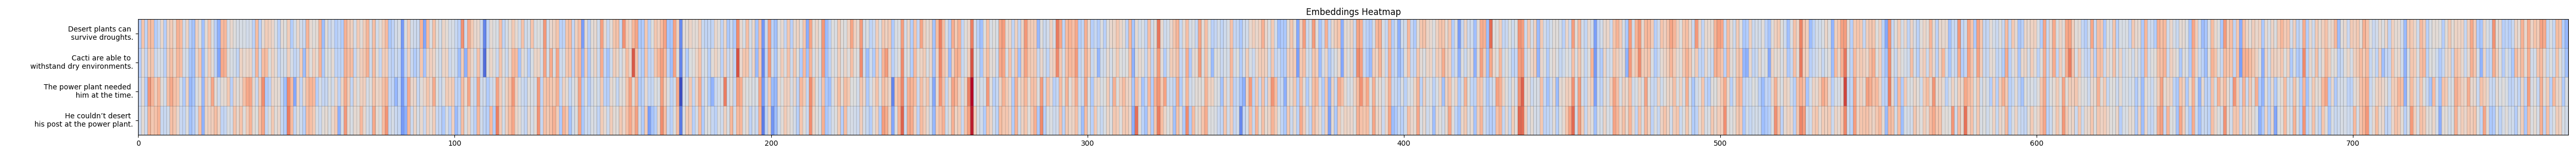

In [13]:
from utils import plot_heatmap

y_labels = input_text_lst_sim

# Plot the heatmap
plot_heatmap(embeddings_array, y_labels = y_labels, title = "Embeddings Heatmap")

Note: the heat map won't show everything because there are 768 columns to show.  To adjust the heat map with your mouse:
- Hover your mouse over the heat map.  Buttons will appear on the left of the heatmap.  Click on the button that has a vertical and horizontal double arrow (they look like axes).
- Left click and drag to move the heat map left and right.
- Right click and drag up to zoom in.
- Right click and drag down to zoom out.

#### Compute cosine similarity
- The `cosine_similarity` function expects a 2D array, which is why we'll wrap each embedding list inside another list.
- You can verify that sentence 1 and 2 have a higher similarity compared to sentence 1 and 4, even though sentence 1 and 4 both have the words "desert" and "plant".

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])

In [16]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))

He couldn’t desert 
          his post at the power plant.
The power plant needed 
          him at the time.
[[0.80995305]]


In [17]:
print(in_1)
print(in_4)
print(compare(embeddings,0,3))

He couldn’t desert 
          his post at the power plant.
Desert plants can 
          survive droughts.
[[0.48815018]]
